In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

from tqdm import tqdm
from tqdm.auto import trange
import caffeine

import gezelter_miller as gm

import matplotlib.pylab as plt
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib as mpl
from pylab import rcParams
import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
plt.style.use('seaborn')

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
plt.style.use('seaborn-white')

tick_labelsize = 10
axes_labelsize = 25
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize
mpl.rcParams['font.size'] = 20

plots_filename = 'plots/'
data_filename = 'data/'

## Set up the model parameters:

In [3]:
params_pe, centre_centres, centre_saddles = gm.param_setup()

e_saddle1 = gm.potential_energy(centre_saddles[0,0], centre_saddles[0,1], params_pe)
e_saddle2 = gm.potential_energy(centre_saddles[1,0], centre_saddles[1,1], params_pe)

print(e_saddle1, e_saddle2)

0.009093080268546412 0.000669734207726363


## Poincaré section in $(x,y)$ plane for $p_y = 0$, mass varying

In [4]:
filename = 'PSS_py0_mass_'

In [5]:
energy_level = 0.00075
x_masses = [1, 2, 4, 8, 16, 32]
x_res = 120
y_res = 80
runtime = 500

for i in range(len(x_masses)):
    
    masses = [x_masses[i], 1]

    contour_b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.25, y_padding = 0.125)
    x_cmesh, y_cmesh, potential_cmesh = gm.meshes(contour_b_box, params_pe)

    traj_intersect = gm.xy_py0_section(energy_level, masses, params_pe, runtime, x_res, y_res, 
                                    label = 'x mass = {}'.format(masses[0]))
    np.save(data_filename+filename+str(x_masses[i]), traj_intersect)

In [6]:
fig, axes = plt.subplots(2,3,figsize = (30, 15))
axes = np.ravel(axes)

for i in range(len(x_masses)):
    
    with open(data_filename+filename+str(x_masses[i])+'.npy', 'rb') as traj_intersect:
        traj_intersect = np.load(traj_intersect, allow_pickle = True)
    
    masses = [x_masses[i],1]
    ax = axes[i]
    
    ax.contour(x_cmesh, y_cmesh, potential_cmesh, levels = [energy_level], colors = ['k'])
    ax.scatter(traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')
    ax.scatter(-traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('$m_x =\; {}$'.format(masses[0]), fontsize = 25)

fig.savefig(plots_filename+'poincare_section')
plt.show()

## Poincaré section in $(x,y)$ plane for $p_y = 0$, energy varying

In [7]:
filename = 'PSS_py0_energy_'

In [24]:
energies = [0.00075, 0.0015, 0.004, 0.0065]

masses = [16, 1]

x_res = 120
y_res = 80
runtime = 500

for i in range(len(energies)):
    
    energy_level = energies[i]

    contour_b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.25, y_padding = 0.125)
    x_cmesh, y_cmesh, potential_cmesh = gm.meshes(contour_b_box, params_pe)

    traj_intersect = gm.xy_py0_section(energy_level, masses, params_pe, runtime, x_res, y_res, 
                                    label = 'energy = {}'.format(energy_level))
    np.save(data_filename+filename+str(energies[i])+'.npy', traj_intersect)

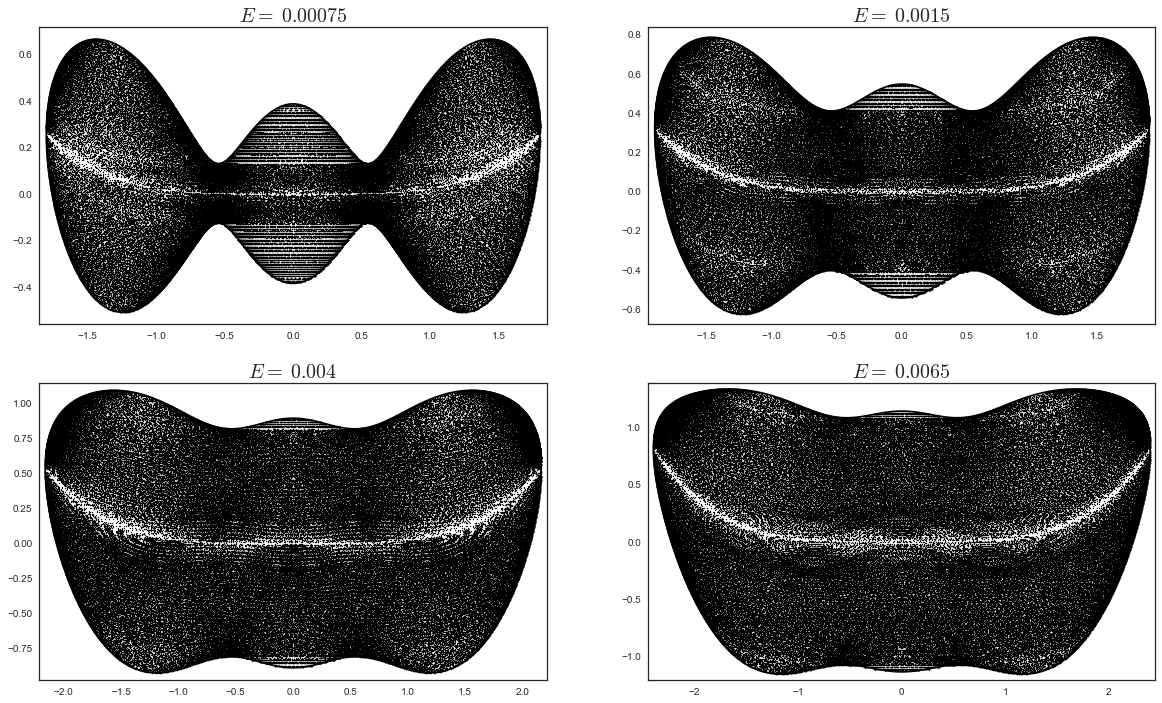

In [25]:
fig, axes = plt.subplots(2,2,figsize = (20, 12))
axes = np.ravel(axes)
masses = [16,1]
for i in range(len(energies)):
    
    energy_level = energies[i]
    
    with open(data_filename+filename+str(energies[i])+'.npy', 'rb') as traj_intersect:
        traj_intersect = np.load(traj_intersect, allow_pickle = True)
              
    ax = axes[i]
    
    bb = gm.bounding_box(energy_level,params_pe, x_padding = 0.05, y_padding = 0.05)
    
    ax.set_xlim(bb[0,:])
    ax.set_ylim(bb[1,:])
    
    ax.contour(x_cmesh, y_cmesh, potential_cmesh, levels = [energy_level], colors = ['k'])
    ax.scatter(traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')
    ax.scatter(-traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')

    ax.set_title('$E =\; {}$'.format(energy_level), fontsize = 20)

fig.savefig(plots_filename+'poincare_section_energies')
plt.show()

## Poincaré section in $(x,y)$ plane for $p_x = 0$, energy varying

In [4]:
filename = 'PSS_px0_energy_'

In [8]:
energies = [0.00075, 0.0015, 0.004, 0.0065]

masses = [16, 1]

x_res = 120
y_res = 80
runtime = 500

for i in range(len(energies)):
    
    energy_level = energies[i]

    contour_b_box = gm.bounding_box(energy_level, params_pe, x_padding = 0.25, y_padding = 0.125)
    x_cmesh, y_cmesh, potential_cmesh = gm.meshes(contour_b_box, params_pe)

    traj_intersect = gm.xy_px0_section(energy_level, masses, params_pe, runtime, x_res, y_res, 
                                    label = 'energy = {}'.format(energy_level))
    np.save(data_filename+filename+str(energies[i])+'.npy', traj_intersect)

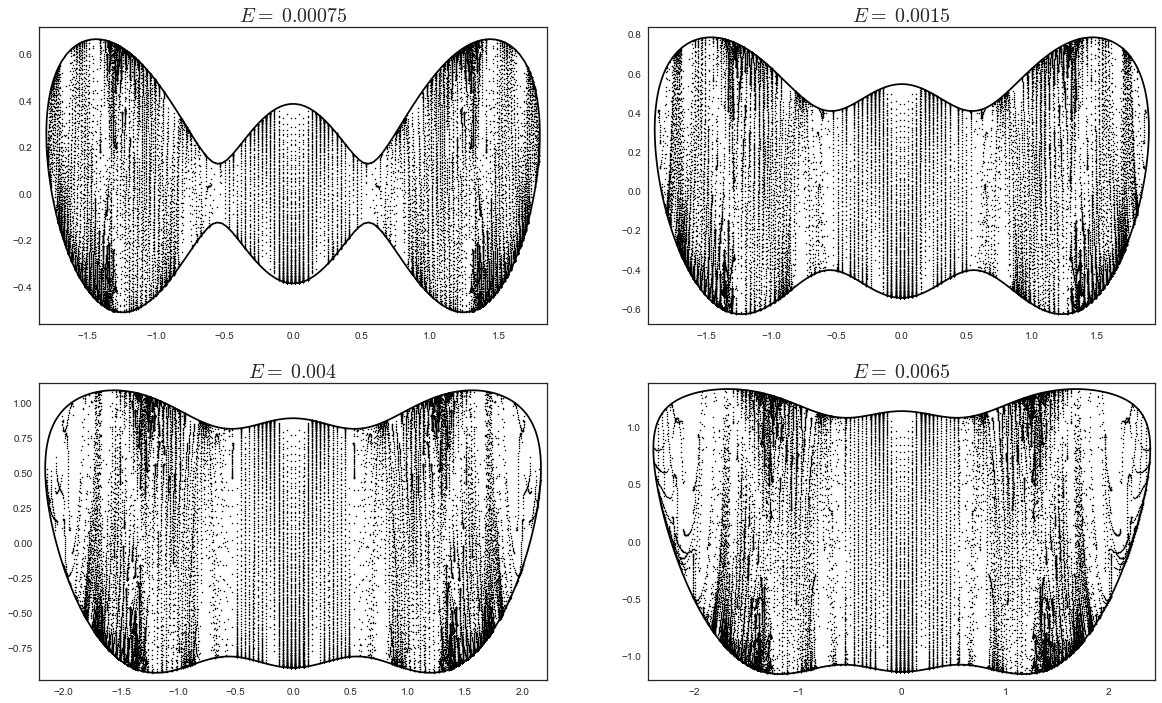

In [9]:
fig, axes = plt.subplots(2,2,figsize = (20, 12))
axes = np.ravel(axes)
masses = [16,1]
for i in range(len(energies)):
    
    energy_level = energies[i]
    
    with open(data_filename+filename+str(energies[i])+'.npy', 'rb') as traj_intersect:
        traj_intersect = np.load(traj_intersect, allow_pickle = True)
              
    ax = axes[i]
    
    bb = gm.bounding_box(energy_level,params_pe, x_padding = 0.05, y_padding = 0.05)
    
    ax.set_xlim(bb[0,:])
    ax.set_ylim(bb[1,:])
    
    ax.contour(x_cmesh, y_cmesh, potential_cmesh, levels = [energy_level], colors = ['k'])
    ax.scatter(traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')
    ax.scatter(-traj_intersect[:,1], traj_intersect[:,2], s=1, c = 'k')

    ax.set_title('$E =\; {}$'.format(energy_level), fontsize = 20)

fig.savefig(plots_filename+'poincare_section_px0_energies')
plt.show()

## Poincaré sections $(x,p_x)$, $y=0$, for varying masses and energies

In [21]:
x_res = 120
px_res = 80

runtime = 200
RelTol, AbsTol = 1e-7, 3e-7


energies = [0.00075, 0.001, 0.00125, 0.0015]
x_masses = [1, 4, 16, 64]

for i in range(len(energies)):
    for j in range(len(x_masses)):
        energy_level = energies[i]
        masses = [x_masses[j],1]
        
        traj_intersect = gm.xpx_y0_section(energy_level, masses, params_pe, runtime, x_res, px_res, 
                                           py_sign = 1, y_event_direction = 1, RelTol = 1e-8, AbsTol = 3e-8, 
                                           label = '{}/16'.format(i * len(energies) + j))
        
        file_name = data_filename + '/PSS_y0_xmass_{}_energy_{}'.format(x_masses[j], energies[i])
        np.save(file_name, traj_intersect)

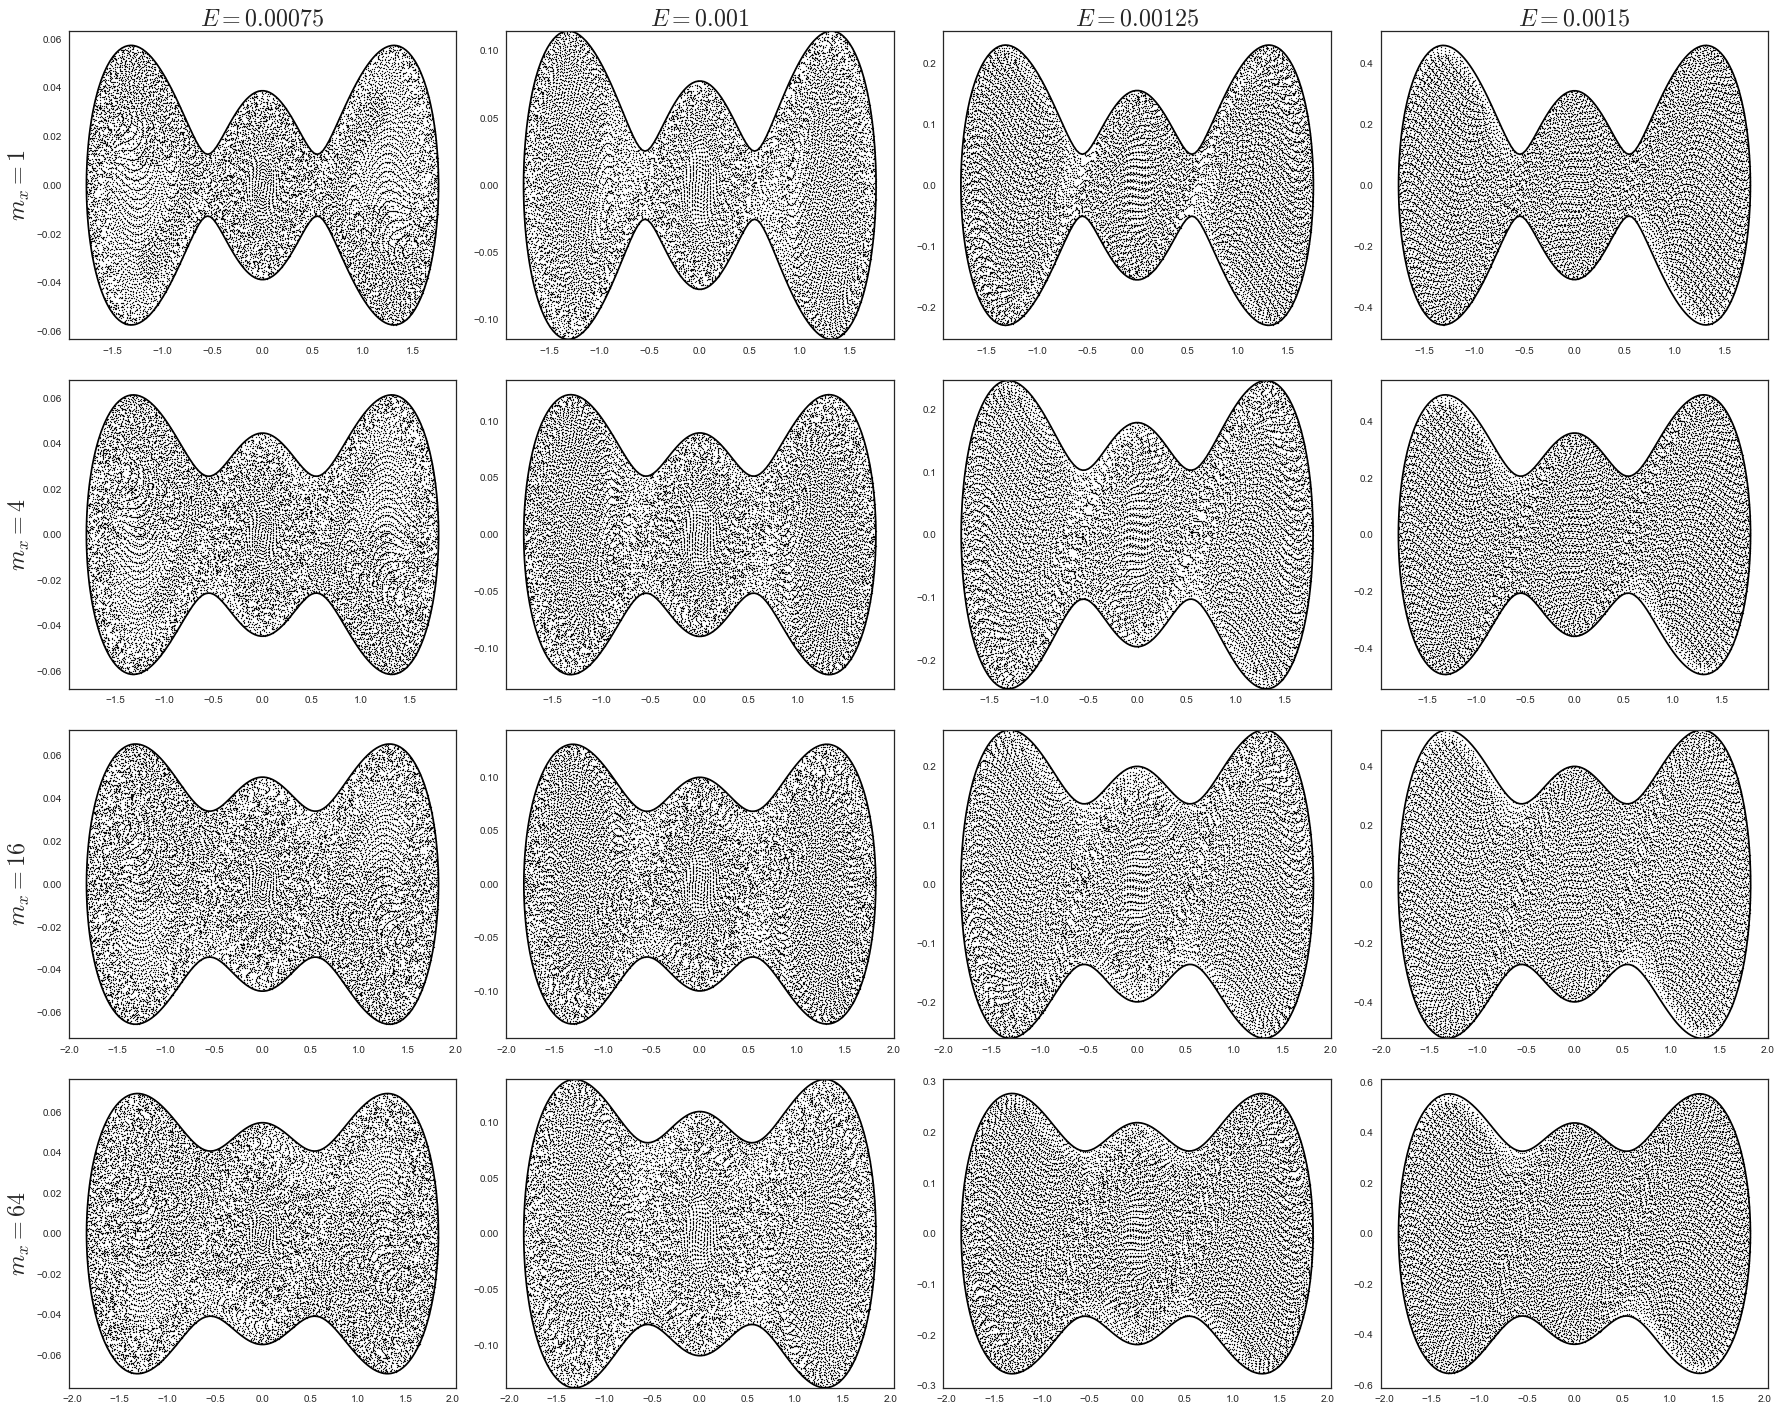

In [25]:
energies = [0.00075, 0.001, 0.00125, 0.0015]
x_masses = [1, 4, 16, 64]

cols = ['$E = {}$'.format(e) for e in energies]
rows = ['$m_x = {}$'.format(mx) for mx in x_masses]

fig, axes = plt.subplots(4,4,figsize=(25,20))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large')
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()

for i in range(len(energies)):
    for j in range(len(x_masses)):

        energy_level = energies[i]
        masses = [x_masses[j],1]
        
        contour_bb = gm.bounding_box_xpx(energy_level, masses, params_pe)

        x_list = np.linspace(contour_bb[0,0], contour_bb[0,1], x_res)
        px_list = np.linspace(contour_bb[1,0], contour_bb[1,1], px_res)
        x_mesh, px_mesh = np.meshgrid(x_list, px_list)
        energy_mesh = gm.total_energy([x_mesh, 0, px_mesh, 0], masses, params_pe)
        axes[i, j].contour(x_mesh, px_mesh, energy_mesh, levels = [energy_level], colors = ['k'])
        
        file_name = data_filename + '/PSS_y0_xmass_{}_energy_{}.npy'.format(x_masses[j], energies[i])
        
        with open(file_name, 'rb') as traj_intersect:
            traj_intersect = np.load(traj_intersect, allow_pickle = True)
        
        axes[i, j].scatter(traj_intersect[:,1], traj_intersect[:,3], s=1, c='k')

fig.savefig(plots_filename+ 'xpx_section_energy_masses.png')
plt.show()

## PS for $x = -0.547$ in $(y, p_y)$ space

In [6]:
x_masses = [1, 4, 16, 64]
energies = [0.00075, 0.0015, 0.004, 0.0065]

x_val = -0.547
runtime = 20000
y_res, py_res = 40, 40

for i in range(len(energies)):
    for j in range(len(x_masses)):

        energy_level = energies[i]
        masses = [x_masses[j], 1]

        traj_intersect = gm.ypy_section(x_val, energy_level, masses, params_pe, runtime, y_res, py_res, 
                                px_sign = 1, x_event_direction = 0, RelTol = 1e-6, AbsTol = 3e-6, 
                                label = '{}/16'.format(i * len(energies) + j))
        
        file_name = data_filename + '/PSS_xneg_mx_{}_E_{}'.format(x_masses[j], energies[i])
        np.save(file_name, traj_intersect)


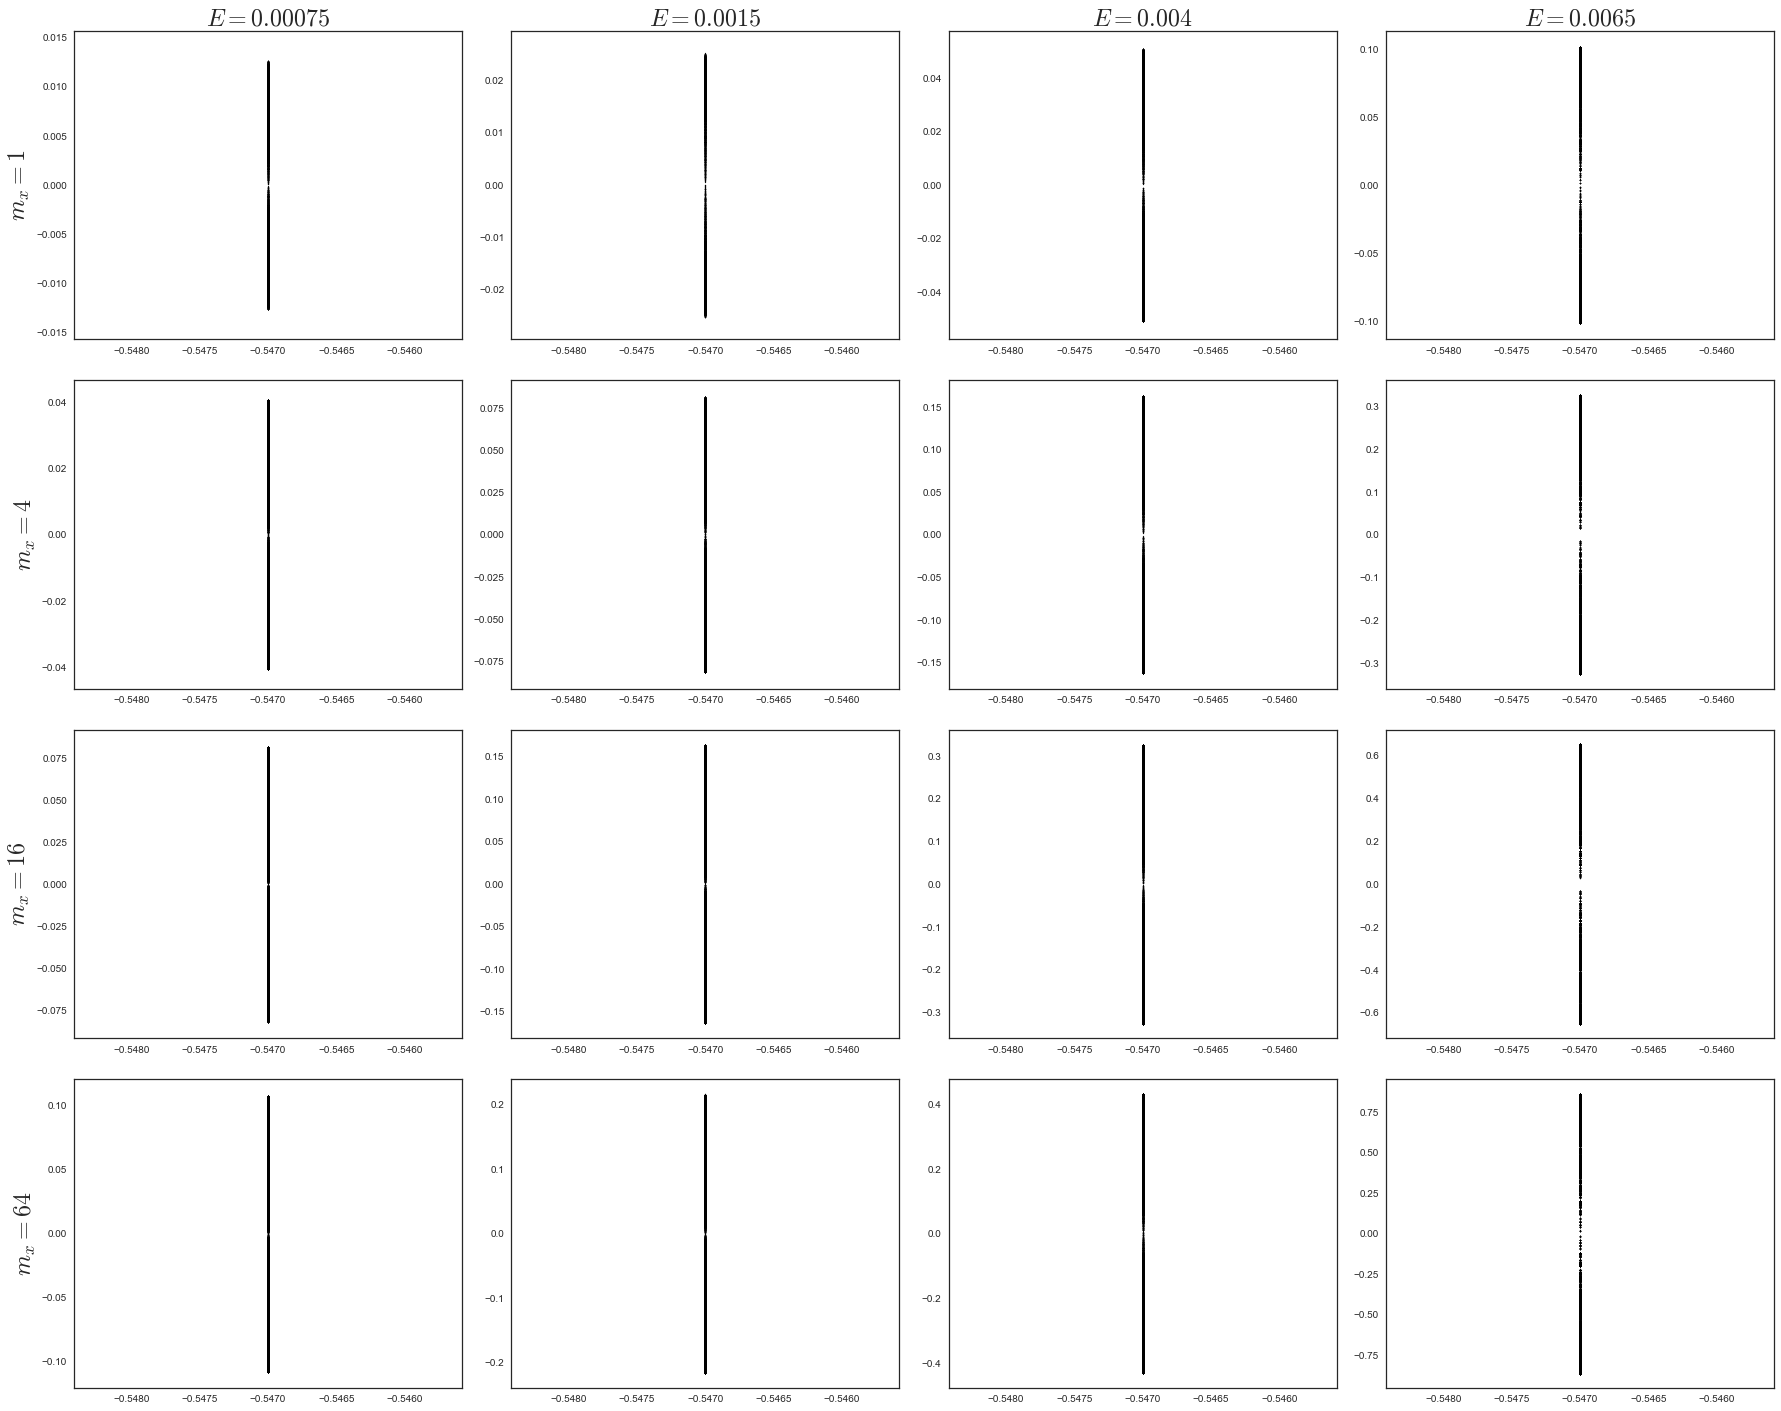

In [8]:
cols = ['$E = {}$'.format(e) for e in energies]
rows = ['$m_x = {}$'.format(mx) for mx in x_masses]

fig, axes = plt.subplots(4,4,figsize=(25,20))
for ax, col in zip(axes[0], cols):
    ax.set_title(col, size='large')
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')
fig.tight_layout()

for i in range(len(energies)):
    for j in range(len(x_masses)):

        energy_level = energies[i]
        masses = [x_masses[j],1]
        
        contour_bb = gm.bounding_box_ypy(x_val, energy_level, masses, params_pe, 
                                         y_padding = 0.01, py_padding = 0.001)

        y_list = np.linspace(contour_bb[0,0], contour_bb[0,1], y_res)
        py_list = np.linspace(contour_bb[1,0], contour_bb[1,1], py_res)
        y_mesh, py_mesh = np.meshgrid(y_list, py_list)
        energy_mesh = gm.total_energy([x_val, y_mesh, 0, py_mesh], masses, params_pe)
#         axes[i, j].contour(y_mesh, py_mesh, energy_mesh, levels = [energy_level], colors = ['k'])
        
        file_name = data_filename + '/PSS_xneg_mx_{}_E_{}.npy'.format(x_masses[j], energies[i])
        
        with open(file_name, 'rb') as traj_intersect:
            traj_intersect = np.load(traj_intersect, allow_pickle = True)
        
        axes[i, j].scatter(traj_intersect[:,1], traj_intersect[:,3], s=1, c='k')

fig.savefig(plots_filename+ 'ypy_section_energy_masses.png')
plt.show()

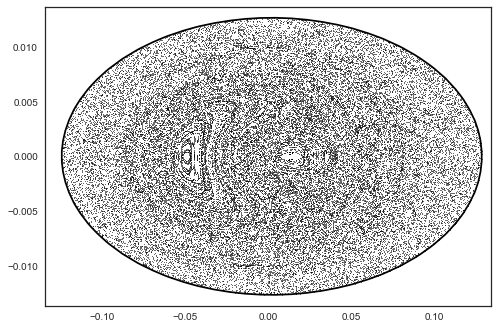

In [40]:
b_box = gm.bounding_box_ypy(x_val, energy_level, masses, params_pe, y_padding = 0.01, py_padding = 0.001)

y_list = np.linspace(b_box[0,0], b_box[0,1], y_res)
py_list = np.linspace(b_box[1,0], b_box[1,1], py_res)
y_mesh, py_mesh = np.meshgrid(y_list, py_list)
energy_mesh = gm.total_energy([x_val, y_mesh, 0, py_mesh], masses, params_pe)

plt.scatter(points[:, 2], points[:, 4], marker = '.', s = 1, c = 'k')
plt.contour(y_mesh, py_mesh, energy_mesh, levels = [0.00075], colors = ['k'])

plt.show()